# Tarea 12 (Corrección)



$Ejercicio 1$: Implementar método implicito de Euler como quieran.


El método implicito es:
$$x_{n+1}=x_n+f(x_{n+1},t_{n+1})h,$$
Observen que en cada paso hay que resolver una ecuación algebraica, por ej, para el primer paso $x_1=x_0+f(x_1,t_1)h$
tenemos que despejar $x_1$. Una forma es utilizar el método de Newton que ya desarrollaron, es decir, si tomamos $g(x)=x-f(x,t_1)h$, el método nos dice que:
$$\tilde x_{k+1}=x_k-\frac{g(x_k)}{g'(\tilde x_k)}.$$
Para asegurar que $\tilde x_k$ converge a $x_1$ (puesto que en general $g(x)$ tiene muchas raices), tenemos que tomar $\tilde x_0$ lo mas cerca posible de $x_1$, lo más prudente es tomar $\tilde x_0=x_0$. Por lo tanto, para cualquier paso tenemos que si conocemos $x_n$, entonces $x_{n+1}$ esta dado por el límite 

$$x_{n+1}=\lim_{k\to \infty}\tilde x_k,$$
donde $\tilde x_{k+1}=x_k-\frac{g(x_k)}{g'(\tilde x_k)}$, con $g(x)=x_n-f(x,t_n)$.

Otra forma de encontrar $x_{n+1}$ sin tener necesidad de calcular la derivada explicitamente, es modificar el método de Newton usando una derivada númerica. Otra forma es utilizar el método de punto fijo.

En la teoría de sistemas dinámicos discretos, donde estos se definen como:
$$x_{n+1}=F(x_n),$$
Obsérvese que el método de Newton y el método de Euler tienen esta forma.

Cuándo $x_n$ converge a alguna parte en el límite de $n\to\infty$, se dice que existe un _punto fijo estable_ y que la condición inicial del nuestro sistema dinámico esta en la _cuenca de atracción_ de dicho _punto fijo estable_ (también conocido como atractor, y sí, existen los repulsores). 
Los puntos fijos, $x^*$, cumplen:
$$x^*=f(x^*),$$
por eso se les dice _fijos_, si el sistema comienza en uno de ellos, la suceción es constante.
Entonces, para resolver la ecuación algebraica presente en el método de Euler, podemos hacer las siguientes identificaciones:

$$x_{n+1}\to x^*\text{ ,y}$$
$$x_n+f(x,t_{n+1})h\to F(x).$$
Es decir, $x_{n+1}$ (con $x_n$ obviamente conocido) es un punto fijo del sistema dinámico:
$$ x_{n+1}^{[k+1]}=x_n+f(x_{n+1}^{[k]},t_{n+1})h,$$
nuevamente es prudente utilizar $x_{n+1}^{[0]}=x_n$.

In [7]:
function metodoNewton(f,df,x0,t)   #Para el metodo implícito de euler ocuparemos el metodo de Newton que ya conocemos
    x = x0                    
    for i in 1:200                   
        x = x-f(x)/df(x)    
    end
    return x                         
end

metodoNewton (generic function with 1 method)

In [8]:
#Definimos la derivada de la función 
function df(x,t)
    -2.5
end

df (generic function with 1 method)

In [12]:


function Método_implícito_Euler(f,df,t0,tf,h,x0)  # Definimos una función para nuestro metodo implicito y también creamos un intervalo
    t = linspace(t0,tf,(tf-t0)/h)                 
    arreglo_x=zeros((tf-t0)/h) # en este arreglo se iran guardando los valores de x tras cada iteración
    x = x0                                      
    arreglo_x[1] = x0
    for i in 2:length(t)          #con este ciclo for se iterara la ecuacuon del metodo de euler implicito              
        g(x) = x - arreglo_x[i-1] - h*f(x,t[i])
        dg(x) = 1 - h*df(x,t[i])
        x = metodoNewton(g,dg,arreglo_x[i-1],t[i])   
        arreglo_x[i] = x
    end
    return(t,arreglo_x)                            
end



Método_implícito_Euler (generic function with 1 method)

In [13]:
# Probamos el método
t_point,x_point = Método_implícito_Euler((x,t)->-2.5*x,df,0,8,0.01,1);

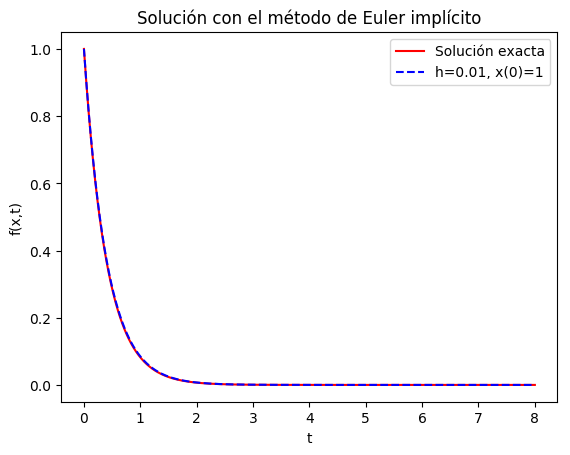

In [15]:
#Donde h=0.01
using PyPlot
title("Solución con el método de Euler implícito") 
x_interval = linspace(0,8,1000)    
y_int = map(x -> exp(-2.5*x), x_interval)
plot(x_interval,y_int,color="red", label = "Solución exacta")  
legend()
plot(t_point,xpoint, color="blue", "--", label = "h=0.01, x(0)=1")
legend()
show()



In [69]:
using PyPlot
#Aqui practicamente es lo mismo que Euler, entonces comenzamos definiendo una funcion 
function euler_puntoM(f::Function,x0,t0,tf,h)
    x = x0 # igualamos x a x0
    lista_x = [] # Definimos un arreglo donde se iran guardando los datos
    push!(lista_x,x) #llenamos nuestro arreglo con las x
    lista_t = linspace(t0,tf,(tf-t0)/h+1) # con esto se crea un intervalo
    
    for i in 2:length(lista_t)  # con este ciclo for se implementara nuestra formula
        t = i*h
        x = x+f(x,t)*h/2
        push!(lista_x,x)
    end
    
  #plot(lista_x,lista_t)  
    return lista_x,lista_t
end


euler_puntoM (generic function with 2 methods)

In [18]:
t_e,x_e = euler_puntoM((x,t)->-2.5*x,0,1,5,0.01); 

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

In [36]:
function Runge_Kutta(f::Function,t0,tf,h,x0) 
t = zeros((tf-t0)/h)                 
x = zeros((tf-t0)/h)                              
t[1] = t0                          
x[1] = x0
    for k in 1:length(t)-1         
        t[k+1] = t[k] + h          
        x[k+1]=x[k]+(h/6)*(f(t[k],x[k])+2(f(t[k]+h/2,x[k]+(h/2)*f(t[k],x[k])))+2(f(t[k]+h/2,x[k]+(h/2)*f(t[k]+h/2,x[k]+(h/2)*f(t[k],x[k]))))+(f(t[k],x[k]+h*f(t[k]+h/2,x[k]+(h/2)*f(t[k]+h/2,x[k]+(h/2)*f(t[k],x[k]))))))
    end
    return(t,x)                    
end

Runge_Kutta (generic function with 2 methods)

In [39]:
t_r,x_r = Runge_Kutta((t,x)->-2.5*x,0,5,0.01,1); 


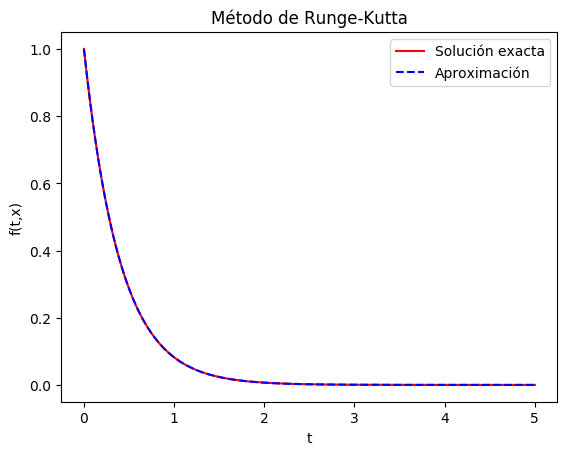

In [41]:
# Graficamos con h=0.01
using PyPlot
title("Método de Runge-Kutta") 
t_interval = linspace(0,5,10000) # el intervalo que tomaremos
y_interval = map(x -> exp(-2.5*x), ts)
plot(ts,ys,color="red", label = "Solución exacta") #Para la solución exacta
legend()
plot(t_r,x_r, color = "blue", "--", label = "Aproximación")
legend()
show()

__Ejercicio 4:__ Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito.

In [48]:
# copiamos la tarea 11 para comenzar a comparar con el metodo implicito
function metodo_euler(f::Function,x0::Int64,t0,tf,h) #comenzamos haciendo la función
    x = x0 # igualamos x a x0
    lista_x = [] # Definimos un arreglo donde se iran guardando los datos
    push!(lista_x,x) #llenamos nuestro arreglo con las x
    lista_t = linspace(t0,tf,(tf-t0)/h+1) # con esto se crea un intervalo
    
    for i in 2:length(lista_t)  # con este ciclo for se implementara nuestra formula
        t = i*h
        x = x+f(x,t)*h
        push!(lista_x,x)
    end
    
    
    return lista_x,lista_t
end

metodo_euler (generic function with 1 method)

In [49]:
# tenemos que la solucion de nuestra ecuación  diferencial es la siguiente
function q(x,t)
    exp.(-5t/2)
end


q (generic function with 1 method)

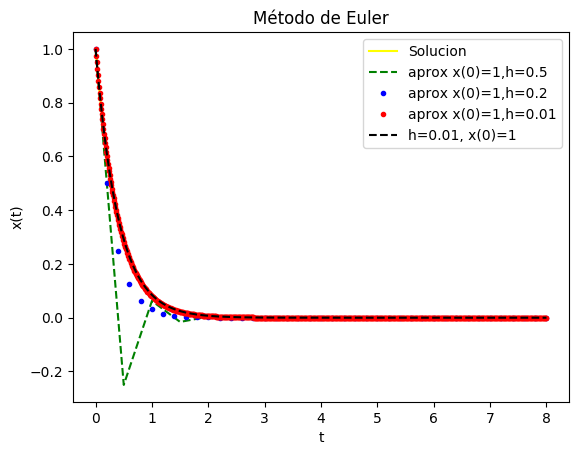

PyObject <matplotlib.legend.Legend object at 0x7f7613d13890>

In [54]:

#Llego la hora de graficar 
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "yellow")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,1,0,8,0.5)[2],metodo_euler((x,t)->-(2.5)*x,1,0,8,0.5)[1],label= "aprox x(0)=1,h=0.5","--",color="green")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,1,0,8,0.2)[2],metodo_euler((x,t)->-(2.5)*x,1,0,8,0.2)[1],label= "aprox x(0)=1,h=0.2",".",color="blue")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,1,0,8,0.01)[2],metodo_euler((x,t)->-(2.5)*x,1,0,8,0.01)[1],label= "aprox x(0)=1,h=0.01",".",color="red")
legend()
plot(t10,x10, color="black", "--", label = "h=0.01, x(0)=1")
legend()

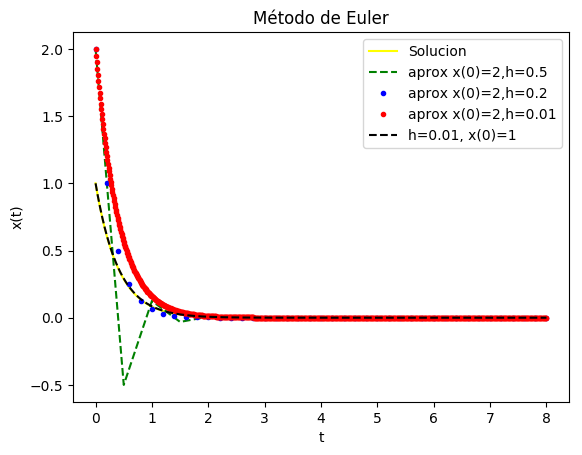

PyObject <matplotlib.legend.Legend object at 0x7f76147ea890>

In [55]:
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "yellow")
plot(metodo_euler((x,t)->-(2.5)*x,2,0,8,0.5)[2],metodo_euler((x,t)->-(2.5)*x,2,0,8,0.5)[1],label= "aprox x(0)=2,h=0.5","--",color="green")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,2,0,8,0.2)[2],metodo_euler((x,t)->-(2.5)*x,2,0,8,0.2)[1],label= "aprox x(0)=2,h=0.2",".",color="blue")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,2,0,8,0.01)[2],metodo_euler((x,t)->-(2.5)*x,2,0,8,0.01)[1],label= "aprox x(0)=2,h=0.01",".",color="red")
legend()
plot(t10,x10, color="black", "--", label = "h=0.01, x(0)=1")
legend()

Podemos observar que la solución se en el método de Euler se aproxima más a la exacta para un paso h más pequeño 

__Ejercicio 5__: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. __Nota: Este es el test para el de Runge-Kutta.__

In [64]:
#Utilizamos el de Rugen_kutta
t12,x12 = Runge_Kutta((t,x)->(2x-18t)/(1+t),0,3,0.01,4);

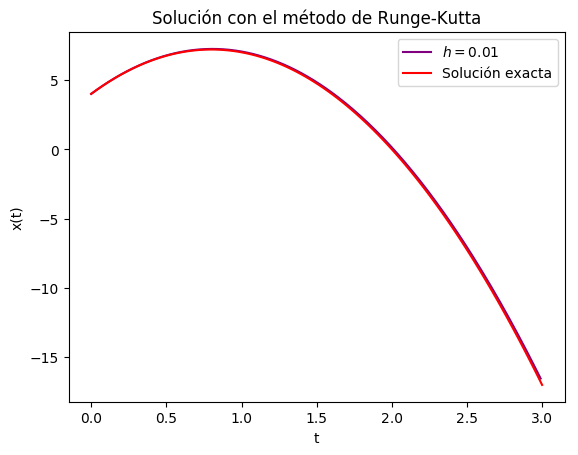

In [65]:
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Solución con el método de Runge-Kutta") 
plot(t12,x12, color="purple", label = L"h=0.01")
legend()
xs = linspace(0,3,100)    
ys = map(t -> 4+8*t-(5*t^2), xs)
plot(xs,ys,color="red", label = "Solución exacta")  
legend()
show()


__Ejercicio 6__: Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

In [52]:

function metodo_euler(f,list,x0) #Realizamos una función para aplicar el metodo de euler independiente de las dimensiones   
    x = x0             #Renombramos variables             
    h = list[2]-list[1]      #El tamaño de paso lo obtedremos restando el segundo elemento del primero       
    listx = []          #Definimos un arreglo vacio    
    push!(listx,x)       #Llnamos el arreglo con valores de x       
    for i in 2:length(list)     #con este ciclo for haremos las iteraciones para el método de Euler, se iniciara de 2     
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x)          
    end
    return listx                    
end

metodo_euler (generic function with 1 method)

In [53]:

#Esta es nuestra funcion de dos variables (v,-kx), donde k =1
list = 0:0.1:10 #Definimos un intervalo
vec = metodo_euler((x,t)->[x[2], -x[1]],list,[1,0]);   
listx1 = map(x->x[1],vec);          
listx2 = map(x->x[2],vec);          



In [54]:
#Hacemos una funcion para la energía potencial
function potencial(k,lista_x)    
    U = (1/2)*k*lista_x.^2
    return U
end 
#Hacemos una función para la energía cinerica
function cinética(m,lista_v)
    K = (1/2)*m*lista_v.^2
    return K
end



cinética (generic function with 1 method)

In [55]:
save_Pot = potencial(1,listx1);
save_Cin= cinética(1,listx2);
total=save_Pot+save_Cin;    

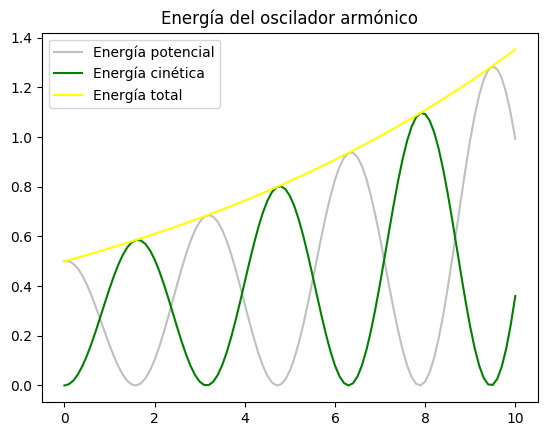

In [56]:
using PyPlot
title("Energía del oscilador armónico") 
plot(list,save_Pot,label = "Energía potencial",color ="silver")       
legend()
plot(list,save_Cin, label = "Energía cinética", color ="green");
legend()
plot(list,total, label = "Energía total", color ="yellow");
legend()
show()

In [83]:
function New_Runge_Kutta(f,list,x0)        
    x = x0                          
    h = list[2]-list[1]             
    listx = []                      
    push!(listx,x)                  
    for i in 2:length(list)         
        t = i*h
        x = x+(h/6)*(f(t,x)+2(f(t+h/2,x+(h/2)*f(t,x)))+2(f(t+h/2,x+(h/2)*f(t+h/2,x+(h/2)*f(t,x))))+(f(t,x+h*f(t+h/2,x+(h/2)*f(t+h/2,x+(h/2)*f(t,x))))))
        push!(listx,x)              
    end
    return listx        
end

metodo_Runge_Kutta (generic function with 1 method)

In [84]:
list = 0:0.1:10;        
vec = New_Runge_Kutta((t,x)->[x[2], -x[1]],list,[1,0]);   
listx3 = map(x->x[1],vec);           
listx4 = map(x->x[2],vec);      



In [85]:
save_Pot = potencial(1,listx3);
save_Cin= cinética(1,listx4);
total=save_Pot+save_Cin; 

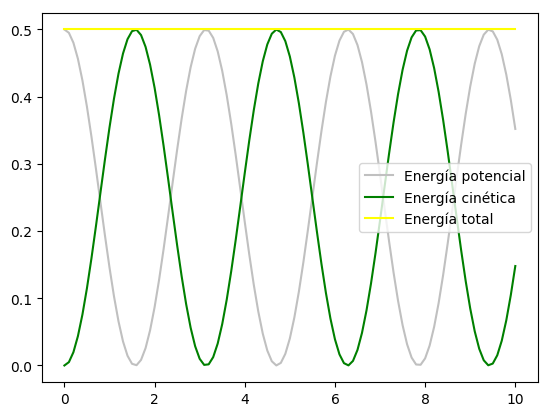

In [87]:
using PyPlot
plot(list,save_Pot, color ="silver", label = "Energía potencial") 
legend()
plot(list,save_Cin, color ="green", label = "Energía cinética");
legend()
plot(list,total, color ="yellow", label = "Energía total");
legend()
show()

__Ejercicio 7:__ Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. 
__Nota:__ Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos `listx` y `listv`, bastará con hacer `plot(listx,listv)`.

In [70]:

list = 0:0.01:10;   
vec = New_Runge_Kutta((t,x)->[x[2], -x[1]],list,[1,0]);   
listx3 = map(x->x[1],vec);      
listx4 = map(x->x[2],vec);          

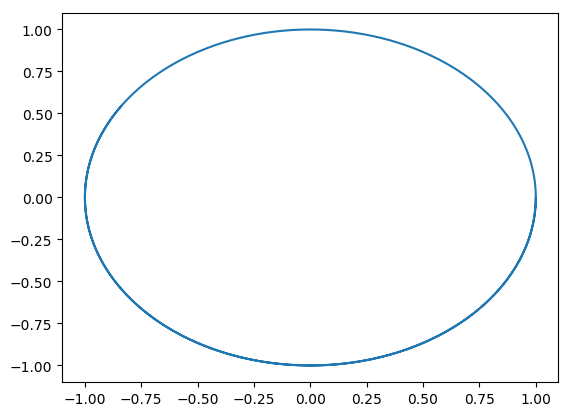

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2a351afe10>

In [74]:
using PyPlot
plot(listx3,listx4)


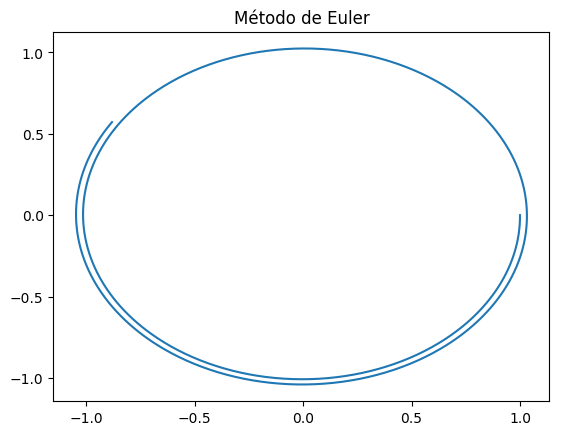

In [92]:
#ahora graficamos el método de Euler
using PyPlot
title("Método de Euler") 
plot(listx1,listx2)  
show()

__Ejercicio 8:__ Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

In [75]:
#Hacemos una función para graficar muchas condiciones iniciales como se pide en el ejercicio
using PyPlot
function Plot(x,y)
f(t,x) = [x[2], -x[1]]     
list = 0:0.1:10;           

vec1 = metodo_Runge_Kutta(f,list,[x,y]);   
listX1 = map(x->x[1],vec1);                
listV1 = map(x->x[2],vec1);                
    
title("Espacio fase del oscilador armónico") 
plot(listX1,listV1, label = "x(0)=$x y v(0)=$y");
legend()
show()
end



Plot (generic function with 1 method)

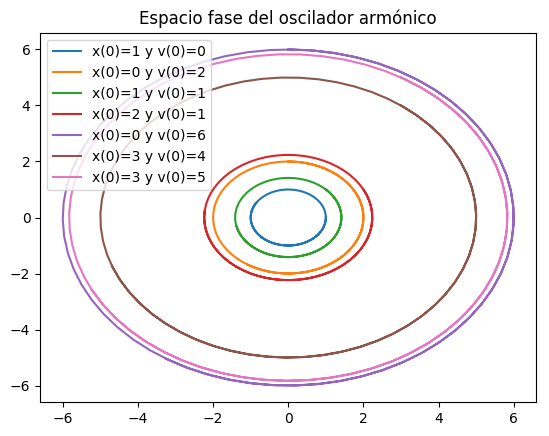

In [76]:
Plot(1,0)
Plot(0,2)
Plot(1,1)
Plot(2,1)
Plot(0,6)
Plot(3,4)
Plot(3,5)
